In [1]:
""" Import Libraries for the tweet scraper """

import json
import time
import threading
from datetime import datetime
from twython import Twython
from os import listdir
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Imports the keys from the python file
from twitter_key import t_key, t_secret

# Assigns the keys to the variables
APP_KEY = t_key
APP_SECRET = t_secret

In [2]:
''' Fetches tweets with a given query at a given lat-long.'''
def get_tweets( latlong=None ):
    # Creates a Twithon object with the given keys
    twitter = Twython( APP_KEY, APP_SECRET )
    # Uses the search function to hit the APIs endpoints and look for recent tweets within the area
    results = twitter.search( geocode=','.join([ str(x) for x in latlong ]) + ',15km', result_type='recent', count=10000)
    # Returns the only the statuses from the resulting JSON
    return results['statuses']

In [3]:
""" Does pretty much what its long name suggests. """
def get_lots_of_tweets( latlong ):
    # Create a dictionary to parse the JSON
    all_tweets = {}
    
    # We will be hitting the API a number of times within the total time
    total_time = 900
    # Everytime we hit the API we subtract time from the total
    remaining_seconds = total_time
    interval = 30 
    while remaining_seconds > 0:
        added = 0
        # We hit the Twitter API
        new_tweets = get_tweets( latlong )
        # We parse the resulting JSON, and save the rest of the raw content
        for tweet in new_tweets:
            tid = tweet['id']
            if tid not in all_tweets and tweet['coordinates'] != None:
                properties = {}
                properties['lat'] = tweet['coordinates']['coordinates'][1]
                properties['lon'] = tweet['coordinates']['coordinates'][0]
                properties['tweet_id'] = tid
                properties['content'] = tweet['text']
                properties['user'] = tweet['user']['id']
                properties['user_location'] = tweet['user']['location']
                properties['raw_source'] = tweet
                properties['data_point'] = 'none'
                properties['time'] = tweet['created_at']
                all_tweets[ tid ] = properties
                added += 1
        print "At %d seconds, added %d new tweets, for a total of %d" % ( total_time - remaining_seconds, added, len( all_tweets ) )
        # We wait a few seconds and hit the API again
        time.sleep(interval)
        remaining_seconds -= interval
    # We return the final dictionary
    return all_tweets

In [4]:
'''This function executes the rest of the functions over a given period of time'''
def run():
    # This is the number of times the code will be executed. In this case, just once. 
    starting = 1
    while starting > 0:
        # Sometimes the API returns some errors, killing the whole script, so we setup try/except to make sure it keeps running
        try:
            # We define a centroid on the MIT Campus, Cambridge, MA
            latlong = [42.359578, -71.092136]
            t = get_lots_of_tweets( latlong )
            # We name every file with the current time
            timestr = time.strftime("%Y%m%d-%H%M%S")
            # We write a new JSON into the target path
            with open( '%stweets.json' %(timestr), 'w' ) as f:
                f.write( json.dumps(t))
            # we can use a library like threading to execute the run function continuously.
            #threading.Timer(10, run).start()
            starting -= 1
        except:
            pass
    
run()

At 0 seconds, added 91 new tweets, for a total of 91
At 30 seconds, added 1 new tweets, for a total of 92
At 60 seconds, added 0 new tweets, for a total of 92
At 90 seconds, added 0 new tweets, for a total of 92
At 120 seconds, added 0 new tweets, for a total of 92
At 150 seconds, added 0 new tweets, for a total of 92
At 180 seconds, added 0 new tweets, for a total of 92
At 210 seconds, added 2 new tweets, for a total of 94
At 240 seconds, added 0 new tweets, for a total of 94
At 270 seconds, added 1 new tweets, for a total of 95
At 300 seconds, added 0 new tweets, for a total of 95
At 330 seconds, added 0 new tweets, for a total of 95
At 360 seconds, added 2 new tweets, for a total of 97
At 390 seconds, added 1 new tweets, for a total of 98
At 420 seconds, added 1 new tweets, for a total of 99
At 450 seconds, added 0 new tweets, for a total of 99
At 480 seconds, added 0 new tweets, for a total of 99
At 510 seconds, added 1 new tweets, for a total of 100
At 540 seconds, added 1 new twe

In [69]:
# Get the file names from a given directory
file_dir = '/Users/mrcampbell/Documents/github/16_11.S947/week4/MIT_tweets' # Set this to where your JSON saved
onlyfiles = [ f for f in listdir(file_dir) if isfile(join(file_dir,f)) and not f.startswith('.')]

# Initialize some lists to store the points, and the ids of the tweets
ids = []
plot_pts = []
all_pts = []

# Loop through all the files
for file in onlyfiles:
    full_dir = join(file_dir,file)
    # Open the JSON
    with open(full_dir) as f:
        data = f.read()
        # Load the JSON as a dict
        dict = json.loads(data)
        # Only add the unique tweets to the list
        if not isinstance(dict, list):
            for key, val in dict.iteritems():
                if key not in ids:
                    ids.append(key)
                    twt_id = val ['tweet_id']
                    lat = val['lat']
                    lon = val['lon']
                    time = val['time']
                    all_pts.append([twt_id, time, lat, lon])
                    plot_pts.append([twt_id, lat, lon])
                    
pts = np.array(all_pts)
plotpt = np.array(plot_pts)

#convert array datatype from unicode to string to satisfy savetxt
pts_update = pts.astype(dtype= 'a30')

#dump tweets array into a csv
np.savetxt("cambridge_tweets.csv", pts_update, delimiter=",", fmt = ('%30s,%30s,%30s,%30s'))

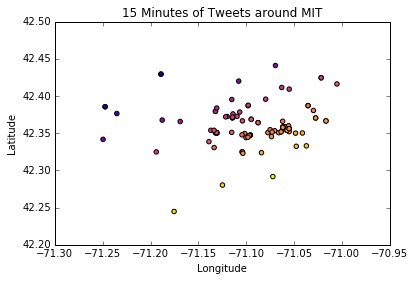

In [79]:
# Use a scatter plot to make a quick visualization of the data points

#create composite of lat/lon to define plot color
plt_loc = plotpt[:,2]*plotpt[:,1]

#create plot
plt.scatter(plotpt[:,2], plotpt[:,1], c = plt_loc, cmap = 'plasma' )
plt.title("15 Minutes of Tweets around MIT")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
